In [9]:
import numpy as np

from typing import Dict, Tuple, Union
from monte_carlo.search import monte_carlo_search
from monte_carlo.node import Decision, Chance, ChanceWithWidening

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

In [11]:
# Action mapping
ACTION_MAP = {0: "←", 1: "↑", 2: "→", 3: "↓", 4: "-"}

def build_graph(node: Union[Decision, Chance], graph: nx.DiGraph, parent: Union[Decision, Chance] = None) -> None:
    node_id = id(node)
    graph.add_node(node_id, visits=node.visits, value=node.values,
                   is_chance=isinstance(node, ChanceWithWidening), action=node.action if isinstance(node, Chance) else 4)
    if parent:
        parent_id = id(parent)
        graph.add_edge(parent_id, node_id)

    for child in node.children:
        build_graph(child, graph, node)

def set_positions(root: Union[Decision, Chance], pos: Dict, depth: int = 0, horizontal_pos: int = 0) -> int:
    node_id = id(root)
    pos[node_id] = (horizontal_pos, -depth)

    if not root.children:
        return horizontal_pos + 1

    for child in root.children:
        horizontal_pos = set_positions(child, pos, depth + 1, horizontal_pos)

    return horizontal_pos

def draw_graph(graph: nx.DiGraph, pos: Dict, ax: Axes) -> None:
    node_colors = ['lightblue' if not graph.nodes[node]['is_chance'] else 'lightgreen' 
                   for node in graph.nodes()]
    nx.draw(graph, pos, ax=ax, with_labels=False, node_color=node_colors,
            node_size=2000, arrows=True)

    labels = {}
    for node in graph.nodes():
        node_data = graph.nodes[node]
        action_str = ACTION_MAP.get(node_data['action'], "") if node_data['action'] is not None else ""
        labels[node] = f"{action_str}\nV: {node_data['visits']}\nQ: {node_data['value']:.2f}"
    
    nx.draw_networkx_labels(graph, pos, labels, ax=ax, font_size=8)

def visualize_tree(root: Union[Decision, Chance]) -> Tuple[nx.DiGraph, Dict]:
    graph = nx.DiGraph()
    pos: Dict = {}
    build_graph(root, graph)
    set_positions(root, pos)

    fig, ax = plt.subplots(figsize=(20, 15))
    draw_graph(graph, pos, ax)
    plt.show()

    return graph, pos

-----

In [12]:
root = Decision(
    state=np.array([[2, 2, 4, 8], [2, 2, 64, 8], [2, 0, 4, 32], [0, 2, 0, 16]]),
    prior=0.0,
    final=False,
)

In [13]:
print(root)

Decision(state=array([[ 2,  2,  4,  8],
       [ 2,  2, 64,  8],
       [ 2,  0,  4, 32],
       [ 0,  2,  0, 16]]), values=0.0, visits=0, children=[], prior=0.0, final=False, parent=None, legal_moves=[0, 1, 2, 3])


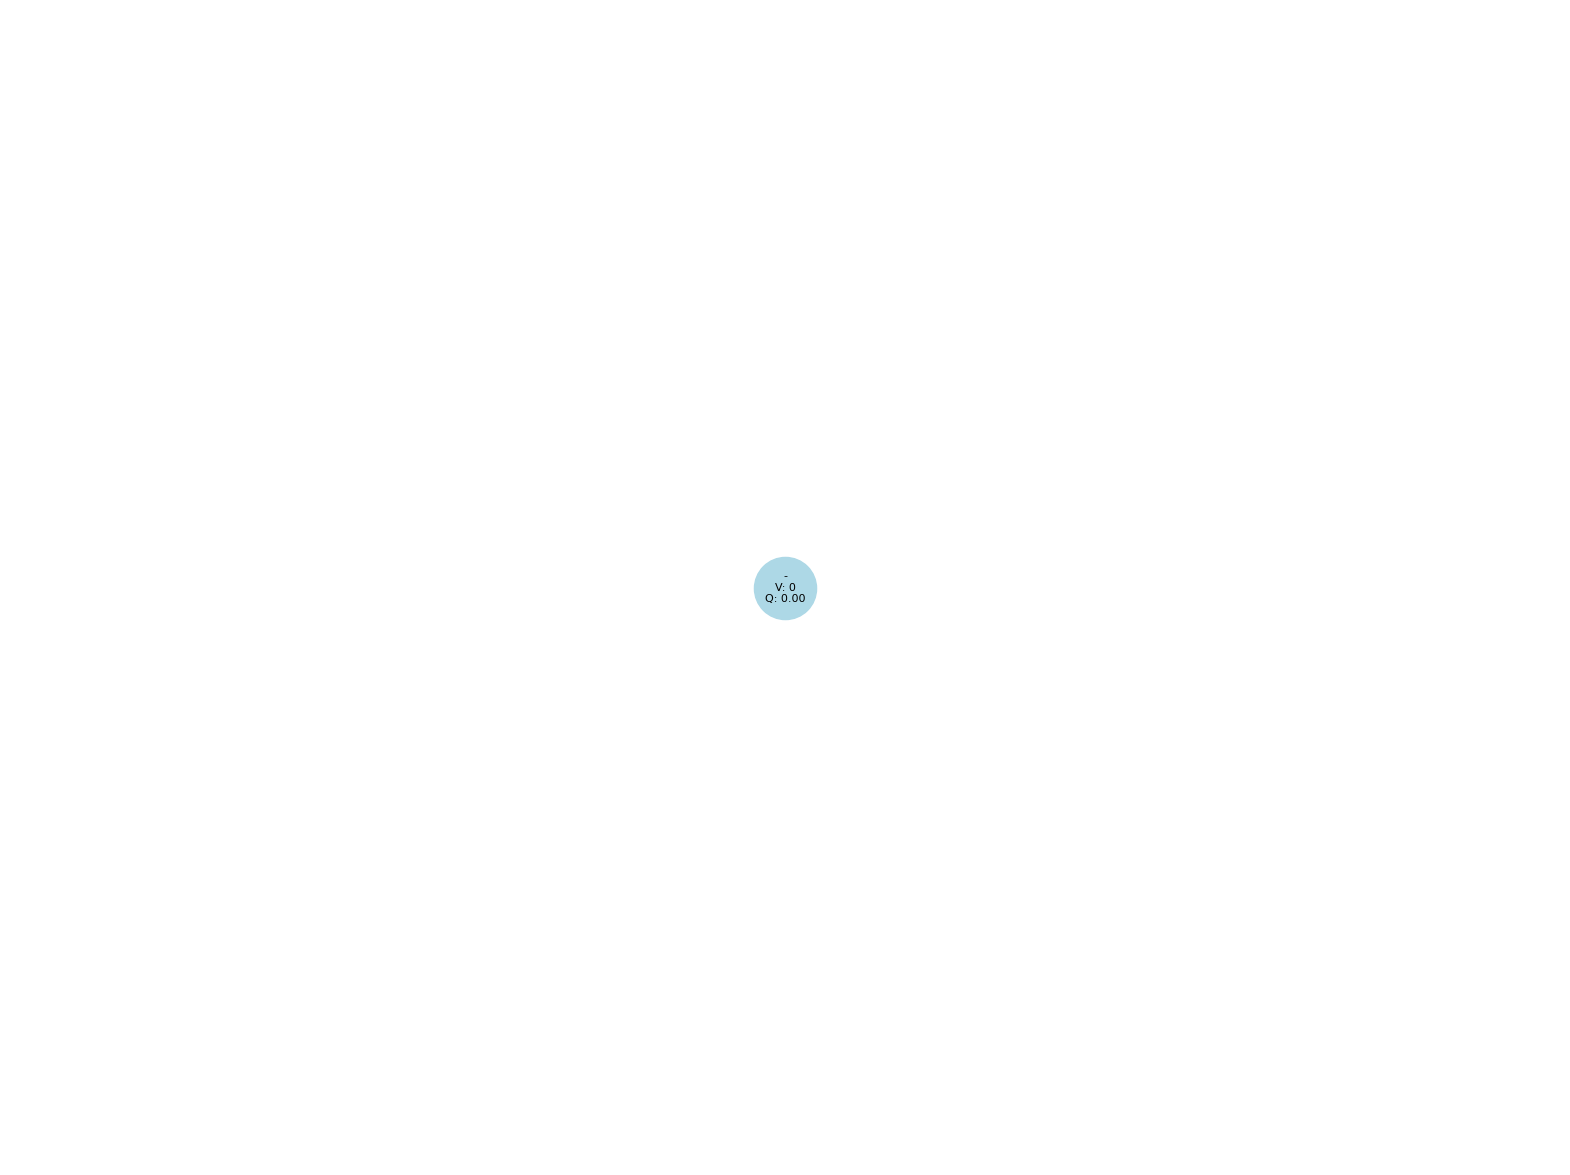

In [14]:
_, _ = visualize_tree(root)

In [15]:
root = monte_carlo_search(np.array([[2, 2, 4, 8], [2, 2, 64, 8], [2, 0, 4, 32], [0, 2, 0, 16]]), iterations=25)

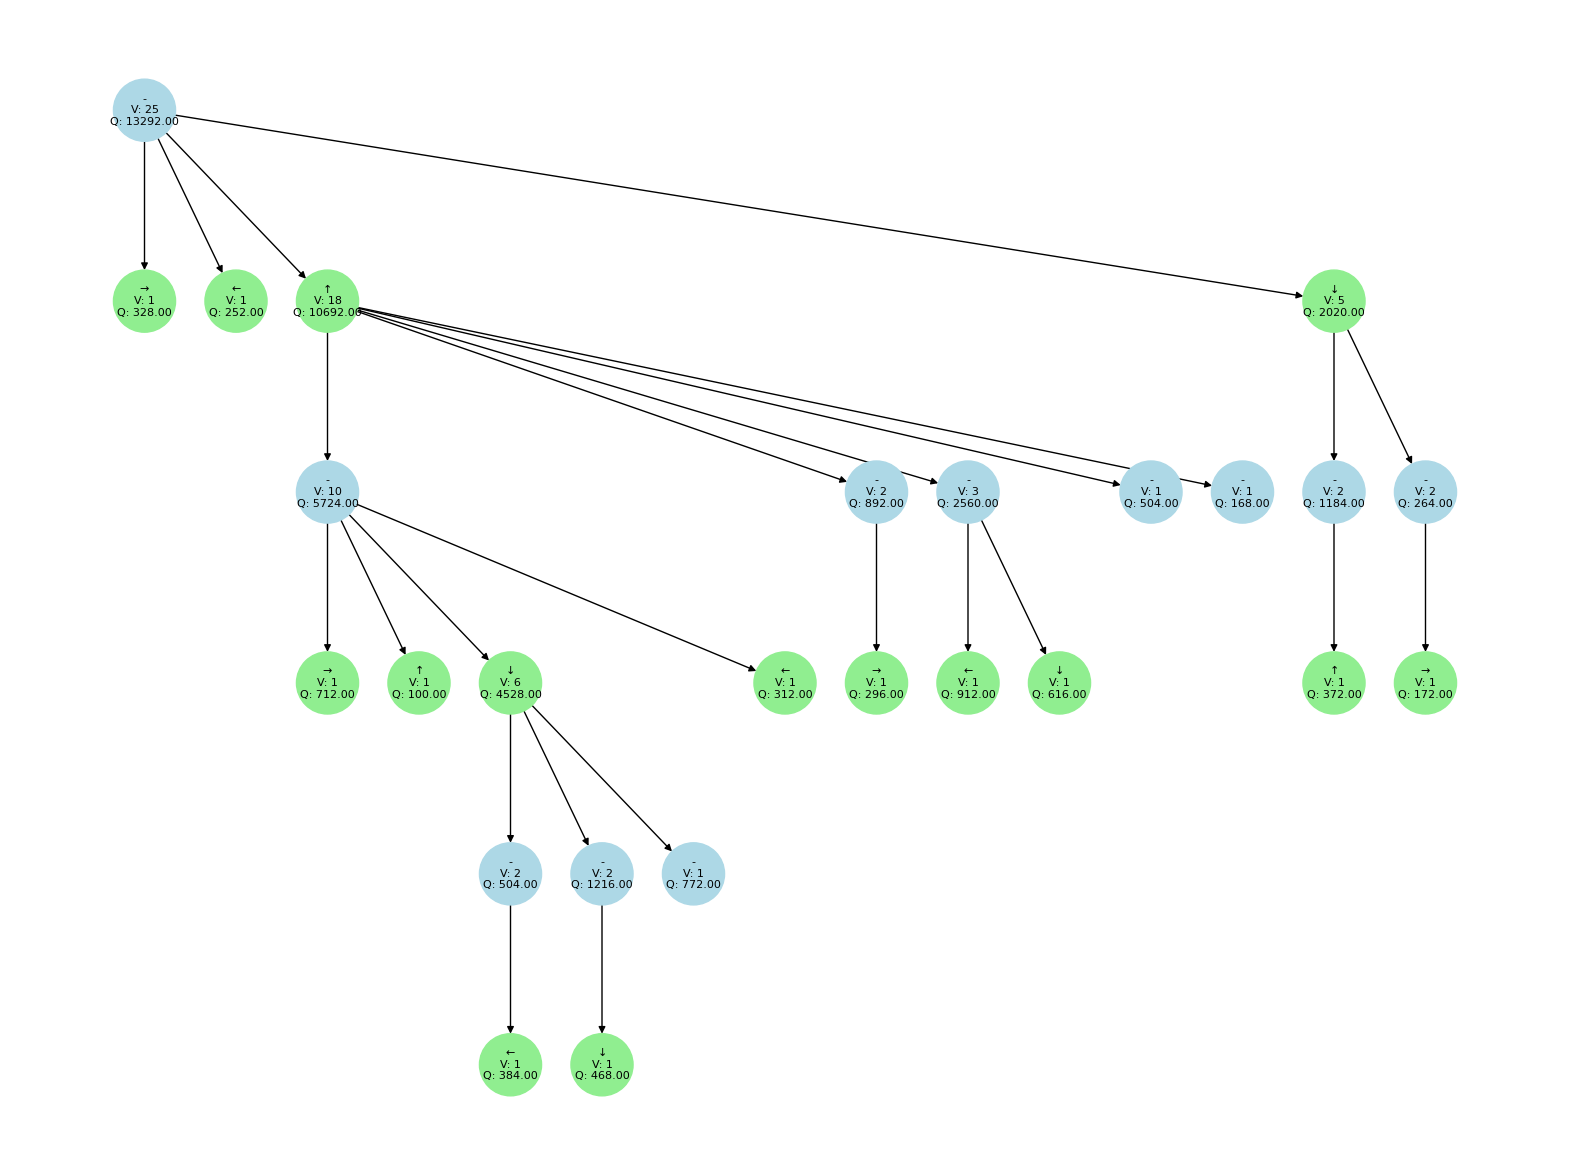

In [16]:
_, _ = visualize_tree(root)